In [1]:
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../front_end")
os.chdir('../front_end/')

In [2]:
accuracy_scores = {}
auc_scores = {}

In [3]:
df = pd.read_excel("../data/annotations/v4-characterized-HIV and TB protocol data.xlsx")

In [4]:
from util.protocol_master_processor import MasterProcessor

2022-06-24 13:54:19.360189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 13:54:19.360232: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
master_processor = MasterProcessor("models/condition_classifier.pkl.bz2", "models/sap_classifier.pkl.bz2",
                                   "models/effect_estimate_classifier.pkl.bz2",
                                   "models/num_subjects_classifier.pkl.bz2",
                                   "models/simulation_classifier.pkl.bz2")

In [6]:
input_folder = "../data/preprocessed_tika/"

file_to_text = {}
dataset_selector_style = None
for root, folder, files in os.walk(input_folder):
    for file_name in files:
        if not file_name.endswith("pkl"):
            continue
        pdf_file = re.sub(".pkl", "", file_name)

        full_file = input_folder + "/" + file_name
        #         print (full_file)
        with open(full_file, 'rb') as f:
            text = pkl.load(f)
        file_to_text[pdf_file] = text

# Get predictions

In [7]:
with open("log_output.txt", "w", encoding="utf-8") as f:
    def log(l):
        f.write(l)
    file_to_results = {}
    for file, pages in file_to_text.items():
        print (file)
        results = master_processor.process_protocol(
            pages, log, disable=[#"phase",
#                 "sap", "effect_estimate", "num_subjects", "country", "simulation"
            ])
    #     print ("RESULTS", results)

        file_to_results[file] = results[1:]

TB-TB-2018-DAR-PIA.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2018-M-P-A.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-Ayles-A Study of the HIV prevention Trials Network.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2019-T-A-b.pdf
HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxazole-Chloroquine.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-Filariasis-2019-Weil-DOLF IDA Papua New Guinea.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2017-Abrams-IMPAACT P1101.pdf
NUT-A-2019-M-T.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-IMPAACT-P1112.pdf
EDD-rotavirus-2017-Isanaka-ROSE.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-Y-2019-M-Y.pdf
NTD-Chagas-2015-Morillo-BENEFIT.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAT-V-2018-R-M.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-GSK1265744.pdf
POL-P-2018-O-A-L.pdf
MAT-Hypothermia-2018-Hansen-Electricity-free Infant Warmer.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


EDD-T-2019-S-T.pdf
NTD-Hookwork-2018-Keiser-Efficacy and safety of a single.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2018-Piazza-A Phase 1b, Randomized, Double-blind.pdf
MAL-Malaria-2019-Llanos-Cuentas-Tafenoquine vs. Primaquine to.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-M-2019-A-S.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-E-2017-A-A.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2017-Bekker-HVTN100.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-Malaria-2019-Tinto-Extension to study MALARIA-055 PRI.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NUT-NUT-2019-A-I.pdf
HIV-HIV-2018-M-A.pdf
HIV-HIV-2017-L-I.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2019-M-A.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


VAC-G-2016-VAC-G-2016-V.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-N-S.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


VAC-Shigellosis-2019-Raqib-Shigella WRSS1 Vaccine trial in Bangladesh.pdf
HIV-HIV-2017-Evolocumab-AMG145.pdf
TB-TB-2015-D-A.pdf
POL-P-2016-G-T.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2019-Suliman-A Phase I_IIa Double-Blind.pdf
MAT-Anemia-2015-Etheredge-Prenatal Iron Supplements Safety and.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-R-E.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2019-H-S.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-Filariasis-2019-Weil-DOLF IDA Haiti.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAT-MAT-2018-G-F.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


EDD-R-2017-G-V.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAT-HIV-2016-Fowler-PROMISE.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2018-H-A.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-HVTN114.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-Long-acting Cabotegravir Plus Long-acting Rilpivirine.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NUT-S-2018-R-S.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


VAC-Tdap-2019-Sancovski-A Post-marketing, Observational, Retrospective.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-t-2017-M-E.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-Lockman-Dolutegravir-Containing versus Efavirenz-Containing Antiretroviral Therapy.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-M-2018-D-C.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NTD-D-2017-S-P.pdf
HIV-HIV-2016-Garrett-HVTN108.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-Labhardt-CASCADE.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2019-Dawson-A Phase 2 Open‐Label Partially .pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-MAL-2018-Dorsey-PROMOTE Birth Cohort 1.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


PNE-P-2019-C-P.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2019-Venter-ADVANCE.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2019-K-C.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


PNE-Pneumonia-2019-Alexander-LEAP2.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAT-Cervical Disease-2019-Greene-LEEP.pdf
TB-TB-2018-Churchyard-Bedaquiline-Delamanid.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-Malaria-2019-Foy-RIMDAMAL.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2019-N-S.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


NUT-Stunting-2019-Humphrey-SHINE.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


PNE-Pneumonia-2018-Keenan-Mortality Reduction After Oral Azithromycin.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


EDD-Cholera-2016-Qadri-Shanchol.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TB-TB-2020-John-Stewart-iTIPS.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


VAC-Ecoli-2019-Qadri-ETVAX.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2018-Havlir-SEARCH.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-Kurth-High-yield HIV testing, facilitated linkage to care.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2017-Corey-HVTN704-HPTN085.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016_Tebas-A5354.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


HIV-HIV-2016-Weinberg-NICHP1091.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


MAL-Malaria-2016-Valencia-Phase 1 and 2a Clinical.pdf
NTD-Filariasis-2019-Weil-DOLF IDA Indonesia.pdf


/home/thomas/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


VAC-M-2015-L-W.pdf


# Evaluate the condition classifier

In [8]:
classes =["Other", "HIV", "TB"]
ground_truths = []
ground_truths_numeric = []
predictions = []
probas = []
for file_name, pages in file_to_text.items():
    prediction = file_to_results[file_name][0]['prediction']
    proba = file_to_results[file_name][0]['probas']
    
    gt = 'Other'
    gt_numeric = 0
    if "HIV" in file_name:
        gt = 'HIV'
        gt_numeric = 1
    elif "TB" in file_name:
        gt = 'TB'
        gt_numeric = 2
    ground_truths.append(gt)
    ground_truths_numeric.append(gt_numeric)
    predictions.append(prediction)
    probas.append(proba)

In [9]:
probas = np.asarray(probas)

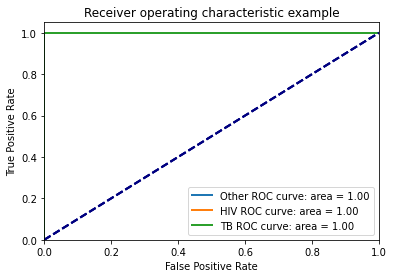

In [10]:
for c in 0, 1,2:
    fpr, tpr, _ = roc_curve([y==c for y in ground_truths_numeric], probas[:,c])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        lw=2,
        label=f"{classes[c]} ROC curve: area = {roc_auc:0.2f}",
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
#     plt.show()

In [11]:
this_auc = roc_auc_score(ground_truths_numeric, probas, multi_class='ovr')
print (f"Condition classifier AUC {this_auc} based on {len(ground_truths)} samples")
auc_scores["Condition classifier"] = this_auc

Condition classifier AUC 1.0 based on 77 samples


In [12]:
acc = accuracy_score(ground_truths, predictions)
print (f"Condition classifier accuracy {acc} based on {len(ground_truths)} samples")
accuracy_scores["Condition classifier"] = acc

Condition classifier accuracy 0.961038961038961 based on 77 samples


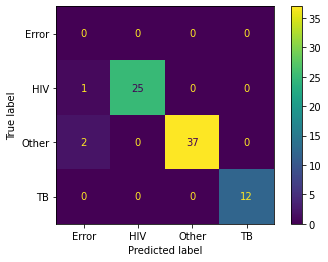

In [13]:
ConfusionMatrixDisplay.from_predictions(ground_truths, predictions)

# Evaluate the phase extractor

In [14]:
ground_truths = []
predictions = []
for idx in range(len(df)):
    print (idx)
    file_name = df["File Name"].iloc[idx]
    if file_name not in file_to_results:
        continue
    prediction = str(file_to_results[file_name][1]['prediction'])
    
    ground_truth = str(df["Phase"].iloc[idx])
    
    ground_truth = re.sub("(a|b)$", "", ground_truth)
    
    if ground_truth == "1/ 2" or ground_truth == "0.5" or ground_truth=="1/2":
        ground_truth = "1.5"
    elif ground_truth == "1":
        ground_truth = "1.0"
    elif ground_truth == "2":
        ground_truth = "2.0"
    elif ground_truth == "3":
        ground_truth = "3.0"
    elif "2022" in ground_truth:
        ground_truth = "1.5"
    
    ground_truths.append(ground_truth)
    predictions.append(prediction)

df["phase_ground_truth"] = ground_truths
df["phase_predicted"] = predictions

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [15]:
df[["File Name", "phase_ground_truth", "phase_predicted"]]

,File Name,phase_ground_truth,phase_predicted
0,HIV-HIV-2017-Bekker-HVTN100.pdf,1.5,1.0
1,"HIV-HIV-2016-Kurth-High-yield HIV testing, fac...",Not reported,0
2,HIV-HIV-2018-Lockman-Dolutegravir-Containing v...,3.0,3.0
3,HIV-HIV-2018-Long-acting Cabotegravir Plus Lon...,3.0,3.0
4,HIV-HIV-2017-Abrams-IMPAACT P1101.pdf,1.5,1.0
5,HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf,2.0,1.0
6,HIV-HIV-2017-Corey-HVTN704-HPTN085.pdf,2.0,1.0
7,HIV-HIV-2016-Garrett-HVTN108.pdf,1.5,1.0
8,HIV-HIV-2018-GSK1265744.pdf,1.0,1.0
9,HIV-HIV-2018-Labhardt-CASCADE.pdf,Not reported,0


In [16]:
df_subset_with_phase = df[df.phase_ground_truth != "Not reported"]

In [17]:
acc = accuracy_score(df_subset_with_phase.phase_ground_truth, df_subset_with_phase.phase_predicted)
print (f"Phase accuracy {acc}")
accuracy_scores["Phase"] = acc

Phase accuracy 0.6842105263157895


# Evaluate the country finder

In [18]:
from country_named_entity_recognition import find_countries

In [19]:
ground_truths = []
predictions = []
for idx in range(len(df)):
    file_name = df["File Name"].iloc[idx]
    prediction = file_to_results[file_name][5]['prediction']
    ground_truth = [c.alpha_2 for c, m in find_countries(df["Country/ Countries"].iloc[idx])]
    ground_truths.append(" ".join(sorted(ground_truth)))
    predictions.append(" ".join(sorted(prediction)))

df["country_ground_truth"] = ground_truths
df["country_predicted"] = predictions

In [20]:
accuracy_score(ground_truths, predictions)

0.47619047619047616

In [21]:
ground_truths

['ZA',
 'KE',
 'BR BW HT IN MW TH TZ UG US ZA ZW',
 'AR AU CA DE ES FR IT KR MX RU SE US ZA',
 'ZA',
 '',
 'CH',
 'US',
 'CN',
 'LS',
 'BR',
 'ZA',
 '',
 'KE UG',
 'US',
 '',
 '',
 'MW',
 'KE',
 'TZ',
 '']

In [22]:
predictions

['ZA',
 'KE',
 'MW',
 'AR MX RU ZA',
 'CN',
 'ZA',
 'ZA',
 'ZA',
 'CN',
 'LS',
 'BR',
 'ZA',
 '',
 'KE UG',
 'ZW',
 'PE',
 'PE',
 'MW',
 'KE',
 'TZ ZM',
 'ZA']

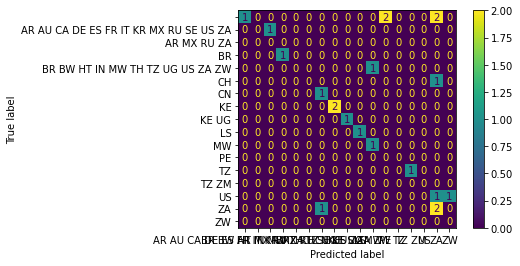

In [23]:
ConfusionMatrixDisplay.from_predictions(ground_truths, predictions)

In [24]:
df["is_international_gt"] = df.country_ground_truth.str.contains(" ")
df["is_international_pred"] = df.country_predicted.str.contains(" ")

In [25]:
acc = accuracy_score(df["is_international_gt"], df["is_international_pred"])
print (f"International vs not international accuracy {acc}")
accuracy_scores["International trial"] = acc

International vs not international accuracy 0.9047619047619048


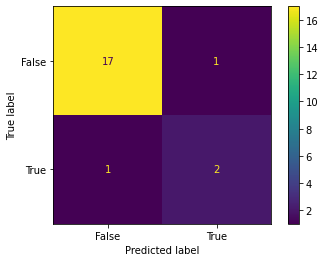

In [26]:
ConfusionMatrixDisplay.from_predictions(df["is_international_gt"], df["is_international_pred"])

# Evaluate the effect estimate extractor

In [27]:
documents_containing_effect_estimate_hardcoded = [
    # "Ahmed" not sure, think not there
    "Corey",
    "HIV-2016-HVTN114",
    "2019-Havlir",
    "MAT-Anemia-2015-Etheredge",
    "MAT-HIV-2016-Fowler-PROMISE",
    "NTD-Filariasis-2019-Weil",
    "NUT-NUT-2019-Ara-Impact of nutrition intervention",
    "NUT-Stunting-2018-Ruel-Strengthening and Evaluating",
    "PNE-Pneumonia-2018-Keenan-Mortality Reduction After Oral",
    "POL-Polio-2016-Grassly-Treatment of enteric inf",
]

In [28]:
files = []
ground_truths = []
predictions = []
for file_name, pages in file_to_text.items():
    prediction = file_to_results[file_name][3]['prediction']
    
    gt = 0
    for d in documents_containing_effect_estimate_hardcoded:
        if d in file_name:
            gt = 1
    
    files.append(file_name)    
    ground_truths.append(gt)
    predictions.append(prediction)
    
    if prediction:
        print ("Found effect estimate for", file_name)
        
df_effect_estimates = pd.DataFrame(
    {"file":files,
    "effect_estimate_ground_truth":ground_truths,
    "effect_estimate_prediction":predictions}
)

Found effect estimate for TB-TB-2018-DAR-PIA.pdf
Found effect estimate for TB-TB-2018-M-P-A.pdf
Found effect estimate for HIV-HIV-2016-Ayles-A Study of the HIV prevention Trials Network.pdf
Found effect estimate for HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxazole-Chloroquine.pdf
Found effect estimate for NTD-Filariasis-2019-Weil-DOLF IDA Papua New Guinea.pdf
Found effect estimate for NUT-A-2019-M-T.pdf
Found effect estimate for EDD-rotavirus-2017-Isanaka-ROSE.pdf
Found effect estimate for NTD-Chagas-2015-Morillo-BENEFIT.pdf
Found effect estimate for MAT-V-2018-R-M.pdf
Found effect estimate for MAT-Hypothermia-2018-Hansen-Electricity-free Infant Warmer.pdf
Found effect estimate for NTD-Hookwork-2018-Keiser-Efficacy and safety of a single.pdf
Found effect estimate for MAL-Malaria-2019-Llanos-Cuentas-Tafenoquine vs. Primaquine to.pdf
Found effect estimate for HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf
Found effect estimate for MAL-M-2019-A-S.pdf
Found effect estimate for NTD-E-2017-A-A.pdf


In [29]:
df_effect_estimates

,file,effect_estimate_ground_truth,effect_estimate_prediction
0,TB-TB-2018-DAR-PIA.pdf,0,1
1,TB-TB-2018-M-P-A.pdf,0,1
2,HIV-HIV-2016-Ayles-A Study of the HIV preventi...,0,1
3,TB-TB-2019-T-A-b.pdf,0,0
4,HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxaz...,0,1
...,...,...,...
72,HIV-HIV-2016_Tebas-A5354.pdf,0,1
73,HIV-HIV-2016-Weinberg-NICHP1091.pdf,0,1
74,MAL-Malaria-2016-Valencia-Phase 1 and 2a Clini...,0,0
75,NTD-Filariasis-2019-Weil-DOLF IDA Indonesia.pdf,1,1


In [30]:
df_effect_estimates[df_effect_estimates.effect_estimate_ground_truth != df_effect_estimates.effect_estimate_prediction]

,file,effect_estimate_ground_truth,effect_estimate_prediction
0,TB-TB-2018-DAR-PIA.pdf,0,1
1,TB-TB-2018-M-P-A.pdf,0,1
2,HIV-HIV-2016-Ayles-A Study of the HIV preventi...,0,1
4,HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxaz...,0,1
7,NUT-A-2019-M-T.pdf,0,1
9,EDD-rotavirus-2017-Isanaka-ROSE.pdf,0,1
11,NTD-Chagas-2015-Morillo-BENEFIT.pdf,0,1
12,MAT-V-2018-R-M.pdf,0,1
15,MAT-Hypothermia-2018-Hansen-Electricity-free I...,0,1
17,NTD-Hookwork-2018-Keiser-Efficacy and safety o...,0,1


In [31]:
acc = accuracy_score(df_effect_estimates["effect_estimate_ground_truth"], df_effect_estimates["effect_estimate_prediction"])
print (f"Effect estimate {acc}")
accuracy_scores["Effect estimate"] = acc

Effect estimate 0.37662337662337664


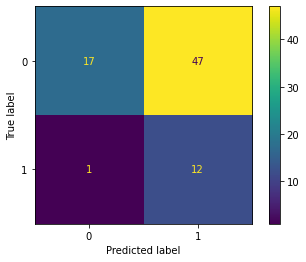

In [32]:
ConfusionMatrixDisplay.from_predictions(df_effect_estimates["effect_estimate_ground_truth"], df_effect_estimates["effect_estimate_prediction"])

# Evaluate the number of subjects extractor

In [33]:
ground_truths = []
predictions = []
for idx in range(len(df)):
    file_name = df["File Name"].iloc[idx]
    prediction = file_to_results[file_name][4]['prediction']
    ground_truth = re.sub(r'\s+.*', '', str(df["Sample size"].iloc[idx]))
    ground_truths.append(ground_truth)
    predictions.append(str(prediction))

df["num_subjects_ground_truths"] = ground_truths
df["num_subjects_predicted"] = predictions

In [34]:
acc = accuracy_score(df["num_subjects_ground_truths"], df["num_subjects_predicted"])
print (f"Number of subjects accuracy {acc}")
accuracy_scores["Number of subjects"] = acc

Number of subjects accuracy 0.9523809523809523


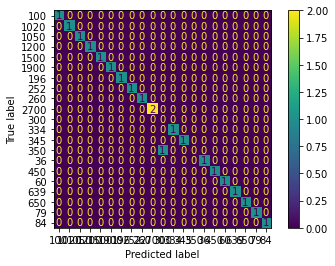

In [35]:
ConfusionMatrixDisplay.from_predictions(df["num_subjects_ground_truths"], df["num_subjects_predicted"])

In [36]:
mean_absolute_error(df["num_subjects_ground_truths"].apply(int), df["num_subjects_predicted"].apply(int))

2.380952380952381

In [37]:
import numpy as np

In [38]:
np.sqrt(mean_squared_error(df["num_subjects_ground_truths"].apply(int), df["num_subjects_predicted"].apply(int)))

10.910894511799619

# Evaluate the SAP extractor

In [39]:
documents_containing_sap_hardcoded = [
    "2019-Tait",
    "Anemia-2019-Maitland",
    "NTD-Yaws-2019-Mitja-Yaws",
    "MAT-Vitamin deficiency-2018",
    "EDD-Typhoid-2019-Shakya",
    "Ahmed",
    "HIV-2016-Nel",
    "Fowler",
    "Hatherill",
 "Venter",
    "Pneumonia-2019-Alexander",
    "Nunn-STREAM",
    "Pneumonia-2018-Keenan",
    "Measles-2015-Low"
]

In [40]:
files = []
ground_truths = []
predictions = []
for file_name, pages in file_to_text.items():
    prediction = file_to_results[file_name][2]['prediction']
    
    gt = 0
    for d in documents_containing_sap_hardcoded:
        if d in file_name:
            gt = 1
    
    files.append(file_name)    
    ground_truths.append(gt)
    predictions.append(prediction)
    
    if prediction:
        print ("Found SAP for", file_name)
        
df_sap = pd.DataFrame(
    {"file":files,
    "sap_ground_truth":ground_truths,
    "sap_prediction":predictions}
)

Found SAP for TB-TB-2018-M-P-A.pdf
Found SAP for TB-TB-2019-T-A-b.pdf
Found SAP for NUT-A-2019-M-T.pdf
Found SAP for EDD-rotavirus-2017-Isanaka-ROSE.pdf
Found SAP for NTD-Chagas-2015-Morillo-BENEFIT.pdf
Found SAP for MAT-V-2018-R-M.pdf
Found SAP for POL-P-2018-O-A-L.pdf
Found SAP for EDD-T-2019-S-T.pdf
Found SAP for MAL-Malaria-2019-Llanos-Cuentas-Tafenoquine vs. Primaquine to.pdf
Found SAP for HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf
Found SAP for MAL-M-2019-A-S.pdf
Found SAP for NUT-NUT-2019-A-I.pdf
Found SAP for HIV-HIV-2018-M-A.pdf
Found SAP for HIV-HIV-2017-L-I.pdf
Found SAP for VAC-G-2016-VAC-G-2016-V.pdf
Found SAP for HIV-HIV-2016-N-S.pdf
Found SAP for TB-TB-2015-D-A.pdf
Found SAP for HIV-HIV-2016-R-E.pdf
Found SAP for HIV-HIV-2019-H-S.pdf
Found SAP for EDD-R-2017-G-V.pdf
Found SAP for MAT-HIV-2016-Fowler-PROMISE.pdf
Found SAP for TB-TB-2018-H-A.pdf
Found SAP for HIV-HIV-2018-Long-acting Cabotegravir Plus Long-acting Rilpivirine.pdf
Found SAP for VAC-Tdap-2019-Sancovski-A Post-mar

In [41]:
df_sap

,file,sap_ground_truth,sap_prediction
0,TB-TB-2018-DAR-PIA.pdf,0,0
1,TB-TB-2018-M-P-A.pdf,0,1
2,HIV-HIV-2016-Ayles-A Study of the HIV preventi...,0,0
3,TB-TB-2019-T-A-b.pdf,1,1
4,HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxaz...,0,0
...,...,...,...
72,HIV-HIV-2016_Tebas-A5354.pdf,0,0
73,HIV-HIV-2016-Weinberg-NICHP1091.pdf,0,0
74,MAL-Malaria-2016-Valencia-Phase 1 and 2a Clini...,0,0
75,NTD-Filariasis-2019-Weil-DOLF IDA Indonesia.pdf,0,0


In [42]:
acc = accuracy_score(df_sap["sap_ground_truth"], df_sap["sap_prediction"])
print (f"SAP accuracy {acc}")
accuracy_scores["SAP"] = acc

SAP accuracy 0.7272727272727273


# Evaluate the simulation extractor

In [43]:
documents_containing_simulation_hardcoded = [
"EDD-Cholera-2016-Qadri-Shanchol",
"HIV-HIV-2016-Garrett-HVTN108",
"HIV-HIV-2016-HVTN114",
"HIV-HIV-2017-Bekker-HVTN100",
"HIV-HIV-2017-Corey-HVTN703-HPTN081",
"HIV-HIV-2017-Corey-HVTN704-HPTN085",
"HIV-HIV-2018-GSK1265744",
"HIV-HIV-2018-Havlir-SEARCH",
"HIV-HIV-2018-IMPAACT-P1112",
"HIV-HIV-2018-Long-acting Cabotegravir Plus Long-acting Rilpivirine",
"HIV-HIV-2019-Havlir-SEARCH",
"MAL-Malaria-2019-Ahmed-STOPMIP Indonesia",
"MAT-HIV-2016-Fowler-PROMISE",
"NTD-trypanosomiasis-2017-Mesu-Efficacy and Safety of Fexinidazole",
"PNE-Pneumonia-2018-Keenan-Mortality Reduction After Oral Azithromycin",
"PNE-Pneumonia-2019-Alexander-LEAP2",
"TB-TB-2018-Hatherill-A Randomized, Placebo Controlled, Partially",
"TB-TB-2019-Tait-A phase IIb, double-blind",
"HIV-HIV-2017-Corey-HVTN703-HPTN081",
"HIV-HIV-2017-Corey-HVTN704-HPTN085",
"HIV-HIV-2018-GSK1265744",
"HIV-HIV-2018-Long-acting Cabotegravir Plus Long-acting Rilpivirine",
"HIV-HIV-2019-Havlir-SEARCH",
"MAT-HIV-2016-Fowler-PROMISE",
"PNE-Pneumonia-2019-Alexander-LEAP2",

]

In [44]:
files = []
ground_truths = []
predictions = []
for file_name, pages in file_to_text.items():
    prediction = file_to_results[file_name][6]['prediction']
    
    gt = 0
    for d in documents_containing_simulation_hardcoded:
        if d in file_name:
            gt = 1
    
    files.append(file_name)    
    ground_truths.append(gt)
    predictions.append(prediction)
    
    if prediction:
        print ("Found simulation for", file_name)
        
df_simulation = pd.DataFrame(
    {"file":files,
    "simulation_ground_truth":ground_truths,
    "simulation_prediction":predictions}
)

Found simulation for HIV-HIV-2016-Ayles-A Study of the HIV prevention Trials Network.pdf
Found simulation for HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf
Found simulation for MAL-M-2019-A-S.pdf
Found simulation for HIV-HIV-2017-Bekker-HVTN100.pdf
Found simulation for HIV-HIV-2019-H-S.pdf
Found simulation for MAT-HIV-2016-Fowler-PROMISE.pdf
Found simulation for TB-TB-2018-H-A.pdf
Found simulation for HIV-HIV-2016-HVTN114.pdf
Found simulation for NUT-S-2018-R-S.pdf
Found simulation for HIV-HIV-2018-Lockman-Dolutegravir-Containing versus Efavirenz-Containing Antiretroviral Therapy.pdf
Found simulation for HIV-HIV-2016-Garrett-HVTN108.pdf
Found simulation for TB-TB-2018-Churchyard-Bedaquiline-Delamanid.pdf
Found simulation for TB-TB-2019-N-S.pdf
Found simulation for HIV-HIV-2018-Havlir-SEARCH.pdf
Found simulation for HIV-HIV-2017-Corey-HVTN704-HPTN085.pdf
Found simulation for VAC-M-2015-L-W.pdf


In [45]:
acc = accuracy_score(df_simulation["simulation_ground_truth"], df_simulation["simulation_prediction"])
print (f"Simulation accuracy {acc}")
accuracy_scores["Simulation"] = acc

Simulation accuracy 0.8181818181818182


In [46]:
df_simulation[df_simulation.simulation_ground_truth != df_simulation.simulation_prediction]

,file,simulation_ground_truth,simulation_prediction
2,HIV-HIV-2016-Ayles-A Study of the HIV preventi...,0,1
3,TB-TB-2019-T-A-b.pdf,1,0
8,HIV-HIV-2018-IMPAACT-P1112.pdf,1,0
13,HIV-HIV-2018-GSK1265744.pdf,1,0
45,HIV-HIV-2018-Long-acting Cabotegravir Plus Lon...,1,0
46,NUT-Stunting-2018-Ruel-Strengthening and Evalu...,0,1
48,NTD-trypanosomiasis-2017-Mesu-Efficacy and Saf...,1,0
49,HIV-HIV-2018-Lockman-Dolutegravir-Containing v...,0,1
59,PNE-Pneumonia-2019-Alexander-LEAP2.pdf,1,0
61,TB-TB-2018-Churchyard-Bedaquiline-Delamanid.pdf,0,1


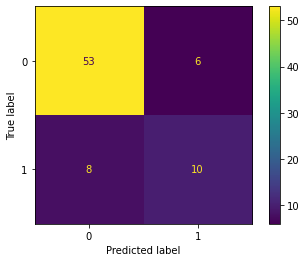

In [47]:
ConfusionMatrixDisplay.from_predictions(df_simulation["simulation_ground_truth"], df_simulation["simulation_prediction"])

# Summarise the accuracy scores

In [48]:
for desc, val in accuracy_scores.items():
    print (f"{desc}\t{val}")

Condition classifier	0.961038961038961
Phase	0.6842105263157895
International trial	0.9047619047619048
Effect estimate	0.37662337662337664
Number of subjects	0.9523809523809523
SAP	0.7272727272727273
Simulation	0.8181818181818182


# Get the complexity of all trials

In [49]:
from util.risk_assessor import calculate_risk_level
from util.constants import SCORE_LOWER_TERTILE, SCORE_UPPER_TERTILE

In [50]:
from util.get_phase_tertiles import get_tertile
from util.tertile_provider import DefaultSampleSizeTertileProvider
tertile_provider = DefaultSampleSizeTertileProvider("sample_size_tertiles.csv")


In [51]:
files = []
complexities = []
levels = []
dataframes = []

for file_name, pages in file_to_text.items():
    
    if not ("HIV" in file_name or "TB" in file_name):
        continue
    
    condition = file_to_results[file_name][0]['prediction']
    phase = file_to_results[file_name][1]['prediction']
    sap = file_to_results[file_name][2]['prediction']
    effect_estimate = file_to_results[file_name][3]['prediction']
    num_subjects = file_to_results[file_name][4]['prediction']
    is_international = len(file_to_results[file_name][5]['prediction']) > 1
    simulation = file_to_results[file_name][6]['prediction']
    
    if phase is None:
        continue
    
    if condition in ["HIV", "TB"]:
        lower_tertile, upper_tertile = get_tertile(tertile_provider, condition, phase)
    else:
        lower_tertile, upper_tertile = get_tertile(tertile_provider, "HIV", phase)
    if num_subjects > upper_tertile:
        tertile = 2
    elif num_subjects > lower_tertile:
        tertile = 1
    else:
        tertile = 0
    num_subjects_and_tertile = (num_subjects, tertile, lower_tertile, upper_tertile)
    
        
    total_score, df, desc = calculate_risk_level(file_name, condition, phase, sap, effect_estimate, num_subjects_and_tertile,
                                               is_international, simulation)
    
    
    display(df)
    
    dataframes.append(df)
    
    if total_score < SCORE_LOWER_TERTILE:
        level = "high"
    elif total_score < SCORE_UPPER_TERTILE:
        level = "medium"
    else:
        level = "low"
    
    files.append(file_name)
    complexities.append(total_score)
    levels.append(level)
    

df_complexities = pd.DataFrame({"file":files,"complexity":complexities, "level":levels})

,Parameter,Value,Weight,Score,Excel Formula
0,TB-TB-2018-DAR-PIA.pdf,None,NaN,NaN,None
1,Trial is for condition,TB,NaN,NaN,None
2,Number of subjects,650,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,50.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,100.0,NaN,NaN,None
5,Trial phase,2.0,5.0,10.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,True,10.0,10.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,TB-TB-2018-M-P-A.pdf,None,NaN,NaN,None
1,Trial is for condition,TB,NaN,NaN,None
2,Number of subjects,240,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,500.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,1500.0,NaN,NaN,None
5,Trial phase,3.0,5.0,15.0,=B7*C7
6,SAP completed?,1,30.0,30.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,0,10.0,0.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2016-Ayles-A Study of the HIV preventi...,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,2500,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,1000.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,2000.0,NaN,NaN,None
5,Trial phase,3.0,5.0,15.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,True,10.0,10.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,TB-TB-2019-T-A-b.pdf,None,NaN,NaN,None
1,Trial is for condition,TB,NaN,NaN,None
2,Number of subjects,450,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,50.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,100.0,NaN,NaN,None
5,Trial phase,2.0,5.0,10.0,=B7*C7
6,SAP completed?,1,30.0,30.0,=B8*C8
7,Effect Estimate disclosed?,0,20.0,0.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,True,10.0,10.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2016-Laufer-Trimethoprim-Sulfamethoxaz...,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,1500,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,1000.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,2000.0,NaN,NaN,None
5,Trial phase,3.0,5.0,15.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,1,10.0,10.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2017-Abrams-IMPAACT P1101.pdf,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,36,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,40.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,130.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,0,20.0,0.0,=B9*C9
8,Number of subjects low/medium/high,0,10.0,0.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2018-IMPAACT-P1112.pdf,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,79,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,40.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,130.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,0,20.0,0.0,=B9*C9
8,Number of subjects low/medium/high,1,10.0,10.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2018-GSK1265744.pdf,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,60,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,40.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,130.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,0,20.0,0.0,=B9*C9
8,Number of subjects low/medium/high,1,10.0,10.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,"TB-TB-2018-Piazza-A Phase 1b, Randomized, Doub...",None,NaN,NaN,None
1,Trial is for condition,TB,NaN,NaN,None
2,Number of subjects,66,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,30.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,60.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,0,20.0,0.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2017-Corey-HVTN703-HPTN081.pdf,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,1900,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,40.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,130.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,1,30.0,30.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


,Parameter,Value,Weight,Score,Excel Formula
0,HIV-HIV-2017-Bekker-HVTN100.pdf,None,NaN,NaN,None
1,Trial is for condition,HIV,NaN,NaN,None
2,Number of subjects,252,NaN,NaN,None
3,Lower tertile number of subjects for phase and...,40.0,NaN,NaN,None
4,Upper tertile number of subjects for phase and...,130.0,NaN,NaN,None
5,Trial phase,1.0,5.0,5.0,=B7*C7
6,SAP completed?,0,30.0,0.0,=B8*C8
7,Effect Estimate disclosed?,1,20.0,20.0,=B9*C9
8,Number of subjects low/medium/high,2,10.0,20.0,=B10*C10
9,International?,False,10.0,0.0,=B11*C11


TypeError: '>' not supported between instances of 'int' and 'NoneType'

In [ ]:
df_all_parameters = pd.DataFrame()
col = []
for df_tmp in dataframes:
    col.append(df_tmp.Parameter.iloc[0])
col.append("WEIGHT")
df_all_parameters["File name"] = col

for i in range(1, 10):
    col = []
    for tmp_df in dataframes:
        col.append(tmp_df.Value.iloc[i])
    col.append(tmp_df.Weight.iloc[i])
        
    df_all_parameters[df.Parameter.iloc[i]] = col
    
formulae = []
num_rows = len(df_all_parameters)
for i in range(num_rows):
    summands = []
    for c in ["E", "F", "G", "H", "I", "J"]:
        summands.append(f"{c}{i+2}*${c}{num_rows+1}")
    formulae.append("'=" + "+".join(summands))

df_all_parameters["Total score"] = formulae

In [ ]:
df_all_parameters

In [ ]:
df_all_parameters.to_excel("/tmp/Complexities.xlsx", index=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(df_complexities["complexity"])

In [ ]:
sns.countplot(x="level", data=df_complexities)
plt.xlabel("Risk level")
plt.ylabel("Count")